In [17]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans,DBSCAN,AgglomerativeClustering
from sklearn.metrics import silhouette_score

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [18]:
df=pd.read_csv('battles.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   index               38 non-null     int64  
 1   name                38 non-null     object 
 2   year                38 non-null     int64  
 3   battle_number       38 non-null     int64  
 4   attacker_king       36 non-null     object 
 5   defender_king       35 non-null     object 
 6   attacker_1          38 non-null     object 
 7   attacker_2          10 non-null     object 
 8   attacker_3          3 non-null      object 
 9   attacker_4          2 non-null      object 
 10  defender_1          37 non-null     object 
 11  defender_2          2 non-null      object 
 12  defender_3          0 non-null      float64
 13  defender_4          0 non-null      float64
 14  attacker_outcome    37 non-null     object 
 15  battle_type         37 non-null     object 
 16  major_deat

In [19]:
df

,index,name,year,battle_number,attacker_king,defender_king,attacker_1,attacker_2,attacker_3,attacker_4,defender_1,defender_2,defender_3,defender_4,attacker_outcome,battle_type,major_death,major_capture,attacker_size,defender_size,attacker_commander,defender_commander,summer,location,region,note
0,0,Battle of the Golden Tooth,298,1,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,NaN,NaN,NaN,win,pitched battle,1.0,0.0,15000.0,4000.0,Jaime Lannister,"Clement Piper, Vance",1.0,Golden Tooth,The Westerlands,NaN
1,1,Battle at the Mummer's Ford,298,2,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Baratheon,NaN,NaN,NaN,win,ambush,1.0,0.0,NaN,120.0,Gregor Clegane,Beric Dondarrion,1.0,Mummer's Ford,The Riverlands,NaN
2,2,Battle of Riverrun,298,3,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,NaN,NaN,NaN,win,pitched battle,0.0,1.0,15000.0,10000.0,"Jaime Lannister, Andros Brax","Edmure Tully, Tytos Blackwood",1.0,Riverrun,The Riverlands,NaN
3,3,Battle of the Green Fork,298,4,Robb Stark,Joffrey/Tommen Baratheon,Stark,NaN,NaN,NaN,Lannister,NaN,NaN,NaN,loss,pitched battle,1.0,1.0,18000.0,20000.0,"Roose Bolton, Wylis Manderly, Medger Cerwyn, H...","Tywin Lannister, Gregor Clegane, Kevan Lannist...",1.0,Green Fork,The Riverlands,NaN
4,4,Battle of the Whispering Wood,298,5,Robb Stark,Joffrey/Tommen Baratheon,Stark,Tully,NaN,NaN,Lannister,NaN,NaN,NaN,win,ambush,1.0,1.0,1875.0,6000.0,"Robb Stark, Brynden Tully",Jaime Lannister,1.0,Whispering Wood,The Riverlands,NaN
5,5,Battle of the Camps,298,6,Robb Stark,Joffrey/Tommen Baratheon,Stark,Tully,NaN,NaN,Lannister,NaN,NaN,NaN,win,ambush,0.0,0.0,6000.0,12625.0,"Robb Stark, Tytos Blackwood, Brynden Tully","Lord Andros Brax, Forley Prester",1.0,Riverrun,The Riverlands,NaN
6,6,Sack of Darry,298,7,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Darry,NaN,NaN,NaN,win,pitched battle,0.0,0.0,NaN,NaN,Gregor Clegane,Lyman Darry,1.0,Darry,The Riverlands,NaN
7,7,Battle of Moat Cailin,299,8,Balon/Euron Greyjoy,Robb Stark,Greyjoy,NaN,NaN,NaN,Stark,NaN,NaN,NaN,win,pitched battle,0.0,0.0,NaN,NaN,Victarion Greyjoy,NaN,1.0,Moat Cailin,The North,NaN
8,8,Battle of Deepwood Motte,299,9,Balon/Euron Greyjoy,Robb Stark,Greyjoy,NaN,NaN,NaN,Stark,NaN,NaN,NaN,win,siege,0.0,0.0,1000.0,NaN,Asha Greyjoy,NaN,1.0,Deepwood Motte,The North,NaN
9,9,Battle of the Stony Shore,299,10,Balon/Euron Greyjoy,Robb Stark,Greyjoy,NaN,NaN,NaN,Stark,NaN,NaN,NaN,win,ambush,0.0,0.0,264.0,NaN,Theon Greyjoy,NaN,1.0,Stony Shore,The North,Greyjoy's troop number based on the Battle of ...


In [20]:
print(df.isnull().sum())

index                  0
name                   0
year                   0
battle_number          0
attacker_king          2
defender_king          3
attacker_1             0
attacker_2            28
attacker_3            35
attacker_4            36
defender_1             1
defender_2            36
defender_3            38
defender_4            38
attacker_outcome       1
battle_type            1
major_death            1
major_capture          1
attacker_size         14
defender_size         19
attacker_commander     1
defender_commander    10
summer                 1
location               1
region                 0
note                  33
dtype: int64


In [21]:
null_columns = ['defender_2', 'defender_3', 'defender_4', 'attacker_2', 'attacker_3', 'attacker_4', 'note']
df = df.drop(null_columns, axis=1)
df=df.dropna()
print(df.isnull().sum())

index                 0
name                  0
year                  0
battle_number         0
attacker_king         0
defender_king         0
attacker_1            0
defender_1            0
attacker_outcome      0
battle_type           0
major_death           0
major_capture         0
attacker_size         0
defender_size         0
attacker_commander    0
defender_commander    0
summer                0
location              0
region                0
dtype: int64


In [22]:
df

,index,name,year,battle_number,attacker_king,defender_king,attacker_1,defender_1,attacker_outcome,battle_type,major_death,major_capture,attacker_size,defender_size,attacker_commander,defender_commander,summer,location,region
0,0,Battle of the Golden Tooth,298,1,Joffrey/Tommen Baratheon,Robb Stark,Lannister,Tully,win,pitched battle,1.0,0.0,15000.0,4000.0,Jaime Lannister,"Clement Piper, Vance",1.0,Golden Tooth,The Westerlands
2,2,Battle of Riverrun,298,3,Joffrey/Tommen Baratheon,Robb Stark,Lannister,Tully,win,pitched battle,0.0,1.0,15000.0,10000.0,"Jaime Lannister, Andros Brax","Edmure Tully, Tytos Blackwood",1.0,Riverrun,The Riverlands
3,3,Battle of the Green Fork,298,4,Robb Stark,Joffrey/Tommen Baratheon,Stark,Lannister,loss,pitched battle,1.0,1.0,18000.0,20000.0,"Roose Bolton, Wylis Manderly, Medger Cerwyn, H...","Tywin Lannister, Gregor Clegane, Kevan Lannist...",1.0,Green Fork,The Riverlands
4,4,Battle of the Whispering Wood,298,5,Robb Stark,Joffrey/Tommen Baratheon,Stark,Lannister,win,ambush,1.0,1.0,1875.0,6000.0,"Robb Stark, Brynden Tully",Jaime Lannister,1.0,Whispering Wood,The Riverlands
5,5,Battle of the Camps,298,6,Robb Stark,Joffrey/Tommen Baratheon,Stark,Lannister,win,ambush,0.0,0.0,6000.0,12625.0,"Robb Stark, Tytos Blackwood, Brynden Tully","Lord Andros Brax, Forley Prester",1.0,Riverrun,The Riverlands
10,10,Battle of Torrhen's Square,299,11,Robb Stark,Balon/Euron Greyjoy,Stark,Greyjoy,win,pitched battle,0.0,0.0,244.0,900.0,"Rodrik Cassel, Cley Cerwyn",Dagmer Cleftjaw,1.0,Torrhen's Square,The North
13,13,Sack of Winterfell,299,14,Joffrey/Tommen Baratheon,Robb Stark,Bolton,Stark,win,ambush,1.0,0.0,618.0,2000.0,"Ramsay Snow, Theon Greyjoy","Rodrik Cassel, Cley Cerwyn, Leobald Tallhart",1.0,Winterfell,The North
14,14,Battle of Oxcross,299,15,Robb Stark,Joffrey/Tommen Baratheon,Stark,Lannister,win,ambush,1.0,1.0,6000.0,10000.0,"Robb Stark, Brynden Tully","Stafford Lannister, Roland Crakehall, Antario ...",1.0,Oxcross,The Westerlands
15,15,Siege of Storm's End,299,16,Stannis Baratheon,Renly Baratheon,Baratheon,Baratheon,win,siege,1.0,0.0,5000.0,20000.0,"Stannis Baratheon, Davos Seaworth","Renly Baratheon, Cortnay Penrose, Loras Tyrell...",1.0,Storm's End,The Stormlands
16,16,Battle of the Fords,299,17,Joffrey/Tommen Baratheon,Robb Stark,Lannister,Tully,loss,pitched battle,0.0,0.0,20000.0,10000.0,"Tywin Lannister, Flement Brax, Gregor Clegane,...","Edmure Tully, Jason Mallister, Karyl Vance",1.0,Red Fork,The Riverlands


In [23]:
x=np.array(df[['defender_size']])
y=np.array(df[['attacker_size']])
d1=df[['defender_size','attacker_size']]

Elbow Method

c:\Program Files\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Program Files\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Program Files\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Program Files\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the 

c:\Program Files\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Program Files\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Program Files\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Program Files\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the 

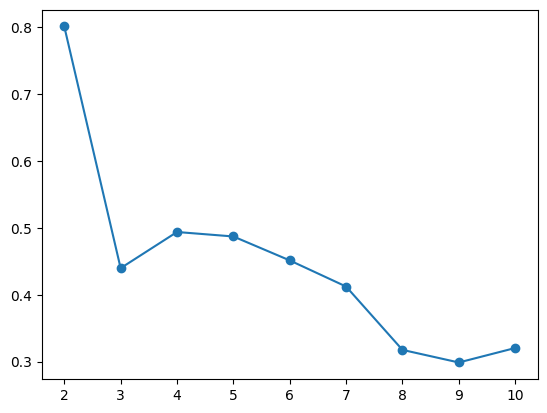

In [24]:
k=np.linspace(2,10,9)
n=[]
for i in range(2,11):
    kmean=KMeans(n_clusters=i,random_state=42).fit(d1)
    n.append(silhouette_score(d1,kmean.labels_))
plt.plot(k,n,marker='o')

In [25]:
k=3

Kmeans Clustering

c:\Program Files\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


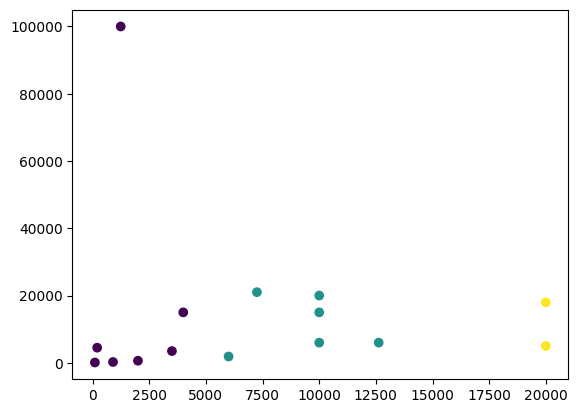

In [30]:
kmeans = KMeans(n_clusters=k, random_state=42).fit(x)
kmeans_silhouette_score = silhouette_score(x,kmeans.labels_)
plt.scatter(x,y, c=kmeans.labels_, cmap='viridis')

DBSCAN Clustering

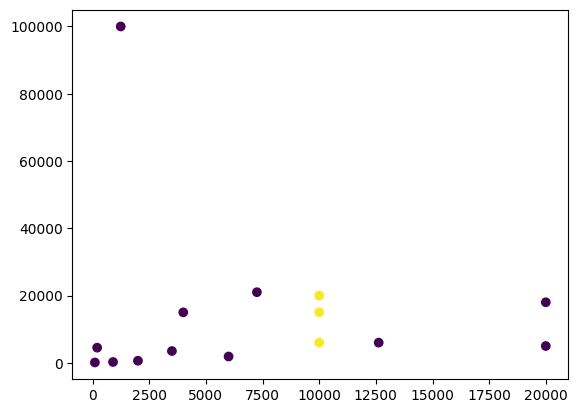

In [27]:
dbscan = DBSCAN(eps=0.5, min_samples=3).fit(x)
dbscan_silhouette_score = silhouette_score(x,dbscan.labels_)
plt.scatter(x,y,c=dbscan.labels_ , cmap='viridis')

Agglomerative Clustering

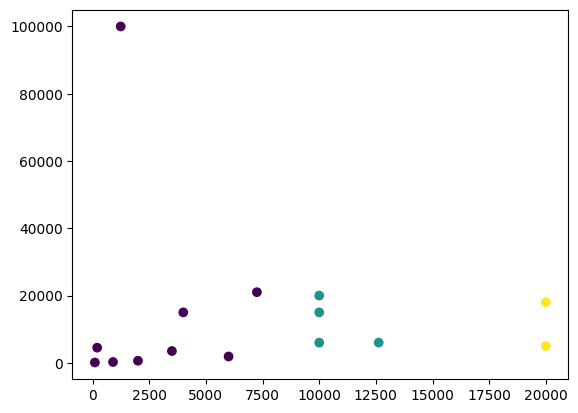

In [28]:
agglomerative_clustering = AgglomerativeClustering(n_clusters=k).fit(x)
agglomerative_clustering_silhouette_score = silhouette_score(x,agglomerative_clustering.labels_)
plt.scatter(x,y,c=agglomerative_clustering.labels_, cmap='viridis')

In [29]:
results = {
    
    'Clustering Model': ['Kmeans Clustering', 'DBSCAN Clustering', 'Agglomerative Clustering', ],
    'Silhouette Score': [kmeans_silhouette_score,dbscan_silhouette_score,agglomerative_clustering_silhouette_score],
}

summary_df = pd.DataFrame(results)
summary_df

,Clustering Model,Silhouette Score
0,Kmeans Clustering,-0.053389
1,DBSCAN Clustering,0.158513
2,Agglomerative Clustering,0.668562
